In [1]:
%matplotlib inline


# pySPEDAS Demo

Written by Nick Hatzigeorgiu and Shawn Polson. 

The purpose of this demo is to demonstrate some of the capabilities of the pySPEDAS package.


The pySPEDAS package contains functions for downloading data from NASA missions 
and tools for data analysis and data plotting. It works together with the 
pytplot and the cdflib packages.

pySPEDAS is a python implementation of the SPEDAS software which is written 
in the IDL programming language. For more information on SPEDAS, 
see: http://spedas.org/wiki/



In [2]:
import pyspedas
import pytplot
from pyspedas import clean_spikes, version
from pytplot import del_data, get_data, store_data, tplot_options, tplot_names, tplot
import os
import pickle

## Load and plot THEMIS data



Note: pySPEDAS uses an environment variable SPEDAS_DATA_DIR to determine the 
local path for saving data files. SPEDAS_DATA_DIR acts as a root data directory 
for all missions, but mission-specific data directories 
(e.g., MMS_DATA_DIR for MMS, THM_DATA_DIR for THEMIS) can also be set, 
and these will override SPEDAS_DATA_DIR.

We can find the version of the installed pyspedas package using `version()`.  



In [3]:
version()

pyspedas version: 1.2.10


Delete any existing pytplot variables.



In [4]:
del_data()

Define a time range. Here, we pick a time range that spans one day.



In [5]:
time_range = ['2015-10-16', '2015-10-17']

You can load data into tplot variables by calling `pyspedas.mission.instrument()`. 
E.g., to load and plot our one day of THEMIS FGM data for probe 'd':

(This following function downloads all the necessary files, loads data, 
and time-clips data to the specified time range.)



In [6]:
thm_fgm = pyspedas.themis.fgm(trange=time_range, probe='d')

09-Nov-22 16:38:14: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thd/l2/fgm/2015/
09-Nov-22 16:38:14: File is current: themis_data/thd/l2/fgm/2015/thd_l2_fgm_20151016_v01.cdf


Mission-specific information and examples can be found in the READMEs of each 
mission directory in the pySPEDAS GitHub repo. E.g., THEMIS: 
https://github.com/spedas/pyspedas/tree/master/pyspedas/themis

Get data from pytplot object into python variables. 
This is useful when we want to work on the data using standard python libraries.



In [7]:
all_data = get_data("thd_fgs_gse")
time = all_data[0]
data = all_data[1]

After working with the data, we can store a new pytplot variable. 
We can store any data in the pytplot object. 



In [8]:
store_data("new_thd_fgs_gse", data={'x': time, 'y': data})

True

We plot the data using the pyqtgraph library (the default). 
Another option is to plot using the bokeh library.



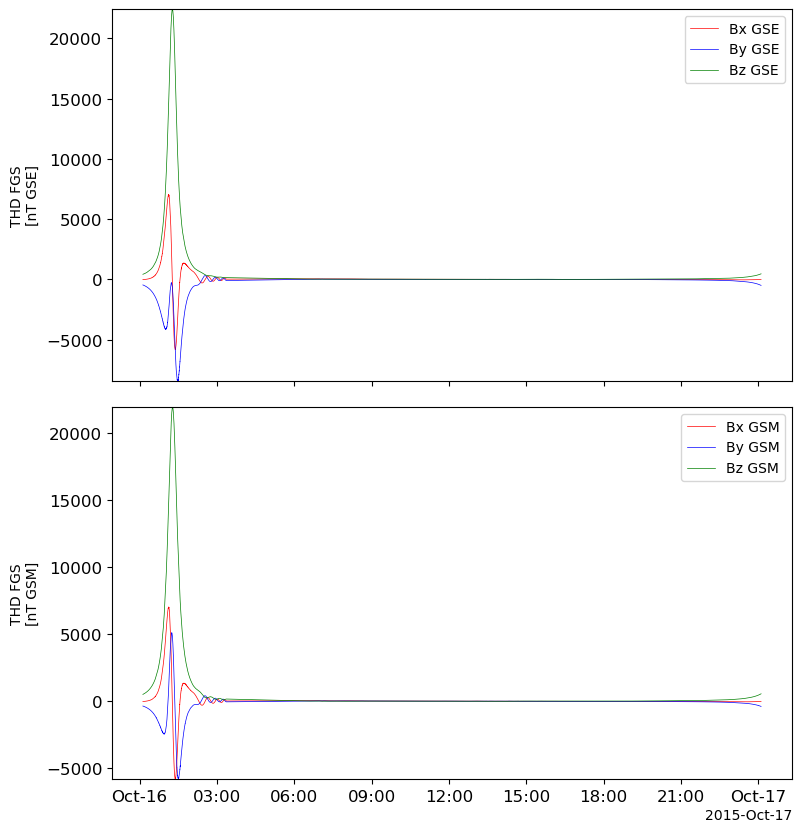

In [9]:
pytplot.options('thd_fgs_gsm', 'Color', ['red', 'blue', 'green'])
pytplot.options('thd_fgs_gse', 'Color', ['red', 'blue', 'green'])
tplot(['thd_fgs_gse', 'thd_fgs_gsm'])

## Load and plot MMS data



Delete any existing pytplot variables, and define a time range.  



In [10]:
del_data()
time_range = ['2015-10-16/13:05:30', '2015-10-16/13:07:30']

Load and plot two minutes of MMS burst mode FGM data:

First we make an `mms_auth_info` pickle file with blank credentials 
in the home directory—this skips a prompt that would ask for an
SDC username (a prompt that you could just submit blank).



In [11]:
with open(os.sep.join([os.path.expanduser('~'), 'mms_auth_info.pkl']), 'wb') as auth_file:
    pickle.dump({'user': '', 'passwd': ''}, auth_file)

mms_fgm = pyspedas.mms.fgm(trange=['2015-10-16/13:05:30', '2015-10-16/13:07:30'], data_rate='brst')

09-Nov-22 16:38:17: Loading pydata/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016130524_v4.18.1.cdf
09-Nov-22 16:38:17: <frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject



The lengths of x and y do not match!
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_brst_l2
mms1_fgm_b_gsm_brst_l2
mms1_fgm_b_dmpa_brst_l2
mms1_fgm_b_bcs_brst_l2
mms1_fgm_flag_brst_l2
Epoch_state
mms1_fgm_hirange_brst_l2
mms1_fgm_bdeltahalf_brst_l2
mms1_fgm_stemp_brst_l2
mms1_fgm_etemp_brst_l2
mms1_fgm_mode_brst_l2
mms1_fgm_rdeltahalf_brst_l2
mms1_fgm_b_dmpa_brst_l2_bvec
mms1_fgm_b_dmpa_brst_l2_btot
mms1_fgm_b_gse_brst_l2_bvec
mms1_fgm_b_gse_brst_l2_btot
mms1_fgm_b_gsm_brst_l2_bvec
mms1_fgm_b_gsm_brst_l2_btot
mms1_fgm_b_bcs_brst_l2_bvec
mms1_fgm_b_bcs_brst_l2_btot


The names of the loaded tplot variables are printed. You can print the names of 
all currently-loaded tplot variables at any time using `pyspedas.tnames()`:



In [12]:
pyspedas.tnames()

['Epoch',
 'mms1_fgm_b_gse_brst_l2',
 'mms1_fgm_b_gsm_brst_l2',
 'mms1_fgm_b_dmpa_brst_l2',
 'mms1_fgm_b_bcs_brst_l2',
 'mms1_fgm_flag_brst_l2',
 'Epoch_state',
 'mms1_fgm_hirange_brst_l2',
 'mms1_fgm_bdeltahalf_brst_l2',
 'mms1_fgm_stemp_brst_l2',
 'mms1_fgm_etemp_brst_l2',
 'mms1_fgm_mode_brst_l2',
 'mms1_fgm_b_dmpa_brst_l2_bvec',
 'mms1_fgm_b_dmpa_brst_l2_btot',
 'mms1_fgm_b_gse_brst_l2_bvec',
 'mms1_fgm_b_gse_brst_l2_btot',
 'mms1_fgm_b_gsm_brst_l2_bvec',
 'mms1_fgm_b_gsm_brst_l2_btot',
 'mms1_fgm_b_bcs_brst_l2_bvec',
 'mms1_fgm_b_bcs_brst_l2_btot']

pySPEDAS has a number of helpful analysis routines under `pyspedas.analysis`. 
E.g., if we want to clean spikes from the data:



In [13]:
clean_spikes(['mms1_fgm_b_gse_brst_l2', 'mms1_fgm_b_gsm_brst_l2'])

mms1_fgm_b_gse_brst_l2 copied to mms1_fgm_b_gse_brst_l2-despike
mms1_fgm_b_gse_brst_l2-despike copied to mms1_fgm_b_gse_brst_l2-despike_tmp_data
mms1_fgm_b_gse_brst_l2-despike_tmp_data copied to mms1_fgm_b_gse_brst_l2-despike_tmp_data-s
tsmooth was applied to: mms1_fgm_b_gse_brst_l2-despike_tmp_data-s
clean_spikes was applied to: mms1_fgm_b_gse_brst_l2-despike
mms1_fgm_b_gsm_brst_l2 copied to mms1_fgm_b_gsm_brst_l2-despike
mms1_fgm_b_gsm_brst_l2-despike copied to mms1_fgm_b_gsm_brst_l2-despike_tmp_data
mms1_fgm_b_gsm_brst_l2-despike_tmp_data copied to mms1_fgm_b_gsm_brst_l2-despike_tmp_data-s
tsmooth was applied to: mms1_fgm_b_gsm_brst_l2-despike_tmp_data-s
clean_spikes was applied to: mms1_fgm_b_gsm_brst_l2-despike


Plot the (despiked) MMS data. 

Note how we use pytplot options to set the line colors. See the full list of 
options at: https://pytplot.readthedocs.io/en/latest/_modules/pytplot/options.html



In [ ]:
pytplot.options('mms1_fgm_b_gse_brst_l2-despike', 'Color', ['purple', 'green', 'red', 'black'])
pytplot.options('mms1_fgm_b_gsm_brst_l2-despike', 'Color', ['purple', 'green', 'red', 'black'])
tplot(['mms1_fgm_b_gse_brst_l2-despike', 'mms1_fgm_b_gsm_brst_l2-despike'], bokeh=False)

Note: The HTML web page for this example may be missing the plots but this is a 
limitation of the platform for this particular gallery — if you run the 
python code locally, the plots will appear. Alternatively, if you use the bokeh library the plots will appear in the web browser.